In [ ]:
#Get on chain data for CerebrumDAO from Basescan
#This gives you the latest 100 token transfers.
#You can increase offset for more data (up to 10,000 per call)

In [23]:
import requests
import pandas as pd

API_KEY = '9XG8DC7BRRWQPFTH9WJD54VYNAAQP3J4JA' #'YOUR_BASESCAN_API_KEY'
TOKEN_ADDRESS = '0x3568c7a4f7545805e379c264303239781B4E9A79' #CEREBRUM address on Basescan

url = f'https://api.basescan.org/api?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&page=1&offset=10000&sort=desc&apikey={API_KEY}'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['result'])
print(df.head())

# Convert dataframe and inspect
# Check if the request was successful
if data['status'] == '1':
    df = pd.DataFrame(data['result'])
    display(df.head())
else:
    print("Error:", data['message'])

  blockNumber   timeStamp                                               hash  \
0    30093180  1746975707  0x14dac838467440b5f25c477757512eb348de92b7ccf7...   
1    30066113  1746921573  0x1edcd1a557e07c720f129643e6376811953e299673b5...   
2    30066113  1746921573  0x1edcd1a557e07c720f129643e6376811953e299673b5...   
3    30062443  1746914233  0xc658b404de957b551518e5934b3f945fb5d99ca71890...   
4    30062443  1746914233  0xc658b404de957b551518e5934b3f945fb5d99ca71890...   

    nonce                                          blockHash  \
0  416844  0x0ee4cef68c21289009eeb9509e0dc366399ebf4612ba...   
1      31  0x5a0fc9155e6ede94cd0742d137255a5e191172c2c22f...   
2      31  0x5a0fc9155e6ede94cd0742d137255a5e191172c2c22f...   
3    2108  0x0998aa7100b1953910d259f75e8f4000869fea66d485...   
4    2108  0x0998aa7100b1953910d259f75e8f4000869fea66d485...   

                                         from  \
0  0x0000000000000000000000000000000000000000   
1  0xdb6f1920a889355780af7570773609b

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,30093180,1746975707,0x14dac838467440b5f25c477757512eb348de92b7ccf7...,416844,0x0ee4cef68c21289009eeb9509e0dc366399ebf4612ba...,0x0000000000000000000000000000000000000000,0x3568c7a4f7545805e379c264303239781b4e9a79,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,2000000000000000000000000000,Cerebrum DAO Token,NEURON,18,1,517494,0,104767,159311,deprecated,7253
1,30066113,1746921573,0x1edcd1a557e07c720f129643e6376811953e299673b5...,31,0x5a0fc9155e6ede94cd0742d137255a5e191172c2c22f...,0xdb6f1920a889355780af7570773609bd8cb1f498,0x3568c7a4f7545805e379c264303239781b4e9a79,0x3391aaaa8dbdd32b38403693ac58a6a9e3d75410,1003160119017809404927879,Cerebrum DAO Token,NEURON,18,36,654823,12802464,380875,7202101,deprecated,34320
2,30066113,1746921573,0x1edcd1a557e07c720f129643e6376811953e299673b5...,31,0x5a0fc9155e6ede94cd0742d137255a5e191172c2c22f...,0x77e0c0e305453365ac024943b68dd26ca48c8871,0x3568c7a4f7545805e379c264303239781b4e9a79,0xdb6f1920a889355780af7570773609bd8cb1f498,1003160119017809404927879,Cerebrum DAO Token,NEURON,18,36,654823,12802464,380875,7202101,deprecated,34320
3,30062443,1746914233,0xc658b404de957b551518e5934b3f945fb5d99ca71890...,2108,0x0998aa7100b1953910d259f75e8f4000869fea66d485...,0x1111111254eeb25477b68fb85ed929f73a960582,0x3568c7a4f7545805e379c264303239781b4e9a79,0x772f4fea5afb02e2aae7ea83bacf68ec755a1db9,7544840787623300896453,Cerebrum DAO Token,NEURON,18,172,162515,2569199,141325,56437536,deprecated,37990
4,30062443,1746914233,0xc658b404de957b551518e5934b3f945fb5d99ca71890...,2108,0x0998aa7100b1953910d259f75e8f4000869fea66d485...,0x77e0c0e305453365ac024943b68dd26ca48c8871,0x3568c7a4f7545805e379c264303239781b4e9a79,0x1111111254eeb25477b68fb85ed929f73a960582,7544840787623300896453,Cerebrum DAO Token,NEURON,18,172,162515,2569199,141325,56437536,deprecated,37990


In [24]:
#Understand the Data. Each row is a token transfer

# Key columns:
#from: sender address
#to: recipient address
#value: amount transferred (in token’s smallest unit)
#timeStamp: when it happened (UNIX time)
#hash: transaction hash

In [29]:
# Convert timestamps and values

df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')
df['value'] = df['value'].astype(float) / (10 ** 18)  # Adjust decimals if token uses 18 decimals
display(df[['timeStamp', 'from', 'to', 'value', 'hash']].head())

,timeStamp,from,to,value,hash
0,2025-05-11 15:01:47,0x0000000000000000000000000000000000000000,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,2.000000e-09,0x14dac838467440b5f25c477757512eb348de92b7ccf7...
1,2025-05-10 23:59:33,0xdb6f1920a889355780af7570773609bd8cb1f498,0x3391aaaa8dbdd32b38403693ac58a6a9e3d75410,1.003160e-12,0x1edcd1a557e07c720f129643e6376811953e299673b5...
2,2025-05-10 23:59:33,0x77e0c0e305453365ac024943b68dd26ca48c8871,0xdb6f1920a889355780af7570773609bd8cb1f498,1.003160e-12,0x1edcd1a557e07c720f129643e6376811953e299673b5...
3,2025-05-10 21:57:13,0x1111111254eeb25477b68fb85ed929f73a960582,0x772f4fea5afb02e2aae7ea83bacf68ec755a1db9,7.544841e-15,0xc658b404de957b551518e5934b3f945fb5d99ca71890...
4,2025-05-10 21:57:13,0x77e0c0e305453365ac024943b68dd26ca48c8871,0x1111111254eeb25477b68fb85ed929f73a960582,7.544841e-15,0xc658b404de957b551518e5934b3f945fb5d99ca71890...


In [31]:
print("Total transactions:", len(df)) #saturated offset!!
print("First transaction:", df.index.min())
print("Last transaction:", df.index.max())

Total transactions: 10000
First transaction: 0
Last transaction: 9999


In [5]:
# SAVE DataFrame to CSV. Last 10000 transactions

df.to_csv('cerebrumdao_transfers_bs.csv', index=False)

In [6]:
# Preliminary analysis of data
# Number of unique holders
unique_holders = df['to'].nunique()
print(f"Unique holders: {unique_holders}")

# Top 10 recipients
top_recipients = df['to'].value_counts().head(10)
print(top_recipients)

Unique holders: 1414
to
0xc8ffeff4469642b42e0e841d89153e4fac70c5f2    1464
0x2231ab3d89335ee52b4810f94389381f4366fff2    1452
0x77e0c0e305453365ac024943b68dd26ca48c8871    1039
0xbc3c5ca50b6a215edf00815965485527f26f5da8     362
0x6ea77f83ec8693666866ece250411c974ab962a8     297
0x11ddd59c33c73c44733b4123a86ea5ce57f6e854     239
0x1111111254eeb25477b68fb85ed929f73a960582     201
0x111111125421ca6dc452d289314280a0f8842a65     192
0x5d64d14d2cf4fe5fe4e65b1c7e3d11e18d493091     178
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad     154
Name: count, dtype: int64


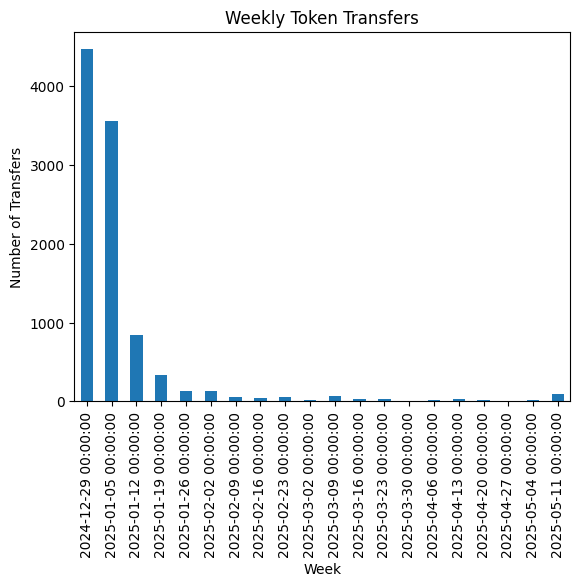

In [7]:
# Visualize the data
# Activity over time

import matplotlib.pyplot as plt

df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')
df.set_index('timeStamp', inplace=True)
df.resample('W').size().plot(kind='bar')
plt.title('Weekly Token Transfers')
plt.xlabel('Week')
plt.ylabel('Number of Transfers')
plt.show()

In [9]:
# 10000 transactions are saturated, need to retry the scraping to capture all time transactions

import requests
import pandas as pd
import time

API_KEY = '9XG8DC7BRRWQPFTH9WJD54VYNAAQP3J4JA' #'YOUR_BASESCAN_API_KEY'
TOKEN_ADDRESS = '0x3568c7a4f7545805e379c264303239781B4E9A79' #CEREBRUM address on Basescan
BASE_URL = 'https://api.basescan.org/api'
offset = 10000
page = 1
all_results = []

while True:
    url = f"{BASE_URL}?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&page={page}&offset={offset}&sort=asc&apikey={API_KEY}"
    print(f"Fetching page {page}...")
    response = requests.get(url)
    data = response.json()
    if data['status'] != '1' or not data['result']:
        print("No more data or error.")
        break
    all_results.extend(data['result'])
    if len(data['result']) < offset:
        print("Last page reached.")
        break
    page += 1
    time.sleep(0.2)  # Be polite to the API

# Convert to DataFrame
df = pd.DataFrame(all_results)
print(f"Total transactions fetched: {len(df)}")

Fetching page 1...
Fetching page 2...
No more data or error.
Total transactions fetched: 10000


In [10]:
# not working, still 10000 transactions in total
# They only allow you to fetch up to 10,000 records per query, and for some endpoints, pagination does not go beyond the first 10,000.
# Why is this happening? The Etherscan/BaseScan API for action=tokentx only supports up to 10,000 results in total, not per page.
# Changing the page parameter does not actually give you the next 10,000 results; it just repeats the first 10,000.
# This is a known limitation of the Etherscan family of APIs. 

In [11]:
# try to use block ranges

import requests
import pandas as pd
import time

API_KEY = '9XG8DC7BRRWQPFTH9WJD54VYNAAQP3J4JA' #'YOUR_BASESCAN_API_KEY'
TOKEN_ADDRESS = '0x3568c7a4f7545805e379c264303239781B4E9A79' #CEREBRUM address on Basescan
BASE_URL = 'https://api.basescan.org/api'
offset = 1000  # Use a smaller offset for reliability
startblock = 0
endblock = 99999999
step = 50000  # Number of blocks per chunk
all_results = []

current_start = startblock
while current_start < endblock:
    current_end = min(current_start + step - 1, endblock)
    url = f"{BASE_URL}?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&startblock={current_start}&endblock={current_end}&page=1&offset={offset}&sort=asc&apikey={API_KEY}"
    print(f"Fetching blocks {current_start} to {current_end}...")
    response = requests.get(url)
    data = response.json()
    if data['status'] != '1' or not data['result']:
        print("No more data or error.")
        break
    all_results.extend(data['result'])
    if len(data['result']) < offset:
        print("Last chunk reached.")
        break
    current_start = current_end + 1
    time.sleep(0.2)  # Be polite to the API

df = pd.DataFrame(all_results)
print(f"Total transactions fetched: {len(df)}")

Fetching blocks 0 to 49999...
No more data or error.
Total transactions fetched: 0


In [12]:
import requests

API_KEY = '9XG8DC7BRRWQPFTH9WJD54VYNAAQP3J4JA' #'YOUR_BASESCAN_API_KEY'
TOKEN_ADDRESS = '0x3568c7a4f7545805e379c264303239781B4E9A79' #CEREBRUM address on Basescan
BASE_URL = 'https://api.basescan.org/api'
url = f"{BASE_URL}?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&startblock=0&endblock=99999999&page=1&offset=10&sort=asc&apikey={API_KEY}"

response = requests.get(url)
data = response.json()
print(data)

{'status': '1', 'message': 'OK', 'result': [{'blockNumber': '17530187', 'timeStamp': '1721849721', 'hash': '0xfa1c708863fc88361d6abd7925f3d9843763fad553673d7e7ab5126358191d9f', 'nonce': '240965', 'blockHash': '0x523026fa4ddfa0916abc2b03cd6d8f3bc0bf5272048ff3dd043234a1427176e1', 'from': '0x0000000000000000000000000000000000000000', 'contractAddress': '0x3568c7a4f7545805e379c264303239781b4e9a79', 'to': '0xf42b0ec6ef1939ededbc369a3e660a276afc88bd', 'value': '20000000000000000000000', 'tokenName': 'Cerebrum DAO Token', 'tokenSymbol': 'NEURON', 'tokenDecimal': '18', 'transactionIndex': '2', 'gas': '492334', 'gasPrice': '0', 'gasUsed': '138967', 'cumulativeGasUsed': '284448', 'input': 'deprecated', 'confirmations': '12569963'}, {'blockNumber': '17530228', 'timeStamp': '1721849803', 'hash': '0xf5623533b19fdb1be2a432ce7e813fc8faadd7d08737be2b7eade6dbc1a48c11', 'nonce': '24', 'blockHash': '0x651e72e973bc40ca909fba77ce294452f9e79313252884e337dcd07c8a849e51', 'from': '0xf42b0ec6ef1939ededbc369a3e

In [32]:
print("df columns:", df.columns)

df columns: Index(['blockNumber', 'timeStamp', 'hash', 'nonce', 'blockHash', 'from',
       'contractAddress', 'to', 'value', 'tokenName', 'tokenSymbol',
       'tokenDecimal', 'transactionIndex', 'gas', 'gasPrice', 'gasUsed',
       'cumulativeGasUsed', 'input', 'confirmations'],
      dtype='object')


In [33]:
# the fetching is working, lets find the start and end blocks

min_block = print(df['blockNumber'].astype(int).min())
max_block = print(df['blockNumber'].astype(int).max())

24241677
30093180


In [34]:
import requests
import pandas as pd
import time

API_KEY = '9XG8DC7BRRWQPFTH9WJD54VYNAAQP3J4JA' #'YOUR_BASESCAN_API_KEY'
TOKEN_ADDRESS = '0x3568c7a4f7545805e379c264303239781B4E9A79' #CEREBRUM address on Basescan
BASE_URL = 'https://api.basescan.org/api'
offset = 1000  # Safe value for reliability

min_block = 24241677
max_block = 30093180
step = 50000  # Number of blocks per chunk

all_results = []

for start in range(min_block, max_block + 1, step):
    end = min(start + step - 1, max_block)
    url = f"{BASE_URL}?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&startblock={start}&endblock={end}&page=1&offset={offset}&sort=asc&apikey={API_KEY}"
    print(f"Fetching blocks {start} to {end}...")
    response = requests.get(url)
    data = response.json()
    if data['status'] == '1' and data['result']:
        all_results.extend(data['result'])
        print(f"Fetched {len(data['result'])} transactions in this chunk.")
    else:
        print(f"No data for blocks {start} to {end}.")
    time.sleep(0.2)  # Be polite to the API

df_all = pd.DataFrame(all_results)
print(f"Total transactions fetched: {len(df_all)}")

Fetching blocks 24241677 to 24291676...
Fetched 1000 transactions in this chunk.
Fetching blocks 24291677 to 24341676...
Fetched 502 transactions in this chunk.
Fetching blocks 24341677 to 24391676...
Fetched 433 transactions in this chunk.
Fetching blocks 24391677 to 24441676...
Fetched 222 transactions in this chunk.
Fetching blocks 24441677 to 24491676...
Fetched 147 transactions in this chunk.
Fetching blocks 24491677 to 24541676...
Fetched 571 transactions in this chunk.
Fetching blocks 24541677 to 24591676...
Fetched 1000 transactions in this chunk.
Fetching blocks 24591677 to 24641676...
Fetched 994 transactions in this chunk.
Fetching blocks 24641677 to 24691676...
Fetched 297 transactions in this chunk.
Fetching blocks 24691677 to 24741676...
Fetched 236 transactions in this chunk.
Fetching blocks 24741677 to 24791676...
Fetched 174 transactions in this chunk.
Fetching blocks 24791677 to 24841676...
Fetched 109 transactions in this chunk.
Fetching blocks 24841677 to 24891676..

In [36]:
# seems like working but total number of transactions is lower than what is reported by basescan
# last try
#maybe try again with step 500?

import requests
import pandas as pd
import time

API_KEY = '9XG8DC7BRRWQPFTH9WJD54VYNAAQP3J4JA' #'YOUR_BASESCAN_API_KEY'
TOKEN_ADDRESS = '0x3568c7a4f7545805e379c264303239781B4E9A79' #CEREBRUM address on Basescan
BASE_URL = 'https://api.basescan.org/api'
offset = 1000  # Safe value for reliability

min_block = 24241677
max_block = 30093180
step = 1000  # or smaller if you want

all_results = []

for start in range(min_block, max_block + 1, step):
    end = min(start + step - 1, max_block)
    page = 1
    while True:
        url = f"{BASE_URL}?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&startblock={start}&endblock={end}&page={page}&offset={offset}&sort=asc&apikey={API_KEY}"
        print(f"Fetching blocks {start} to {end}, page {page}...")
        response = requests.get(url)
        data = response.json()
        if data['status'] == '1' and data['result']:
            all_results.extend(data['result'])
            print(f"Fetched {len(data['result'])} transactions in this page.")
            if len(data['result']) < offset:
                break  # Last page for this block range
            page += 1
        else:
            print(f"No data for blocks {start} to {end}, page {page}.")
            break
        time.sleep(0.2)  # Be polite to the API

df_all = pd.DataFrame(all_results)
print(f"Total transactions fetched: {len(df_all)}")

Fetching blocks 24241677 to 24242676, page 1...
Fetched 298 transactions in this page.
Fetching blocks 24242677 to 24243676, page 1...
Fetched 417 transactions in this page.
Fetching blocks 24243677 to 24244676, page 1...
Fetched 346 transactions in this page.
Fetching blocks 24244677 to 24245676, page 1...
Fetched 265 transactions in this page.
Fetching blocks 24245677 to 24246676, page 1...
Fetched 221 transactions in this page.
Fetching blocks 24246677 to 24247676, page 1...
Fetched 249 transactions in this page.
Fetching blocks 24247677 to 24248676, page 1...
Fetched 163 transactions in this page.
Fetching blocks 24248677 to 24249676, page 1...
Fetched 164 transactions in this page.
Fetching blocks 24249677 to 24250676, page 1...
Fetched 87 transactions in this page.
Fetching blocks 24250677 to 24251676, page 1...
Fetched 99 transactions in this page.
Fetching blocks 24251677 to 24252676, page 1...
Fetched 72 transactions in this page.
Fetching blocks 24252677 to 24253676, page 1..

In [37]:
# SAVE DataFrame to CSV. Last 10002 transactions

df.to_csv('cerebrumdao_transfers_bs_all.csv', index=False)